In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from DataFuncs import DataFuncs
from PlotFunctions import PlotFuncs
sns.set(style="darkgrid", rc={'figure.figsize':(12,8)})

# Enable interactive notebook

In [3]:
%matplotlib notebook

# Main


Load Experiment data. 

In [4]:
DataFuncsObj = DataFuncs()
all_tag_measurements = pd.read_pickle(r'tag_measurements_2020_03_28.pkl')
all_tag_measurements = all_tag_measurements.dropna(how='any').reset_index(drop=True)

# Plots without windowing

In [ ]:
# pd.unique(all_tag_measurements.obstacle)
obstacle = 'No Obstacle'
show_measurements = all_tag_measurements.where(all_tag_measurements.obstacle == obstacle)
show_measurements = show_measurements.dropna(how='any').reset_index(drop=True)

In [ ]:
plt.figure()
ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"], hue =show_measurements["DisplayName"] ).set_title(obstacle + " - All setups")
# plt.figure()
# ax = sns.boxplot(x=np.round(show_measurements["distance"]*4)/4, y=show_measurements["rssi"] ).set_title(obstacle + " - All setups")

boxolot for each setup

In [ ]:
# pd.unique(show_measurements.setup)
for setup in pd.unique(show_measurements.setup):
    setup_measurements = show_measurements.where(show_measurements.setup == setup)
    title_str = str(obstacle) + " - " + str(setup)
    plt.figure()
#     color by display name
#     sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"], hue =setup_measurements["DisplayName"]) .set_title(title_str)
#     all devices united
    sns.boxplot(x=np.round(setup_measurements["distance"]*4)/4, y=setup_measurements["rssi"]) .set_title(title_str)
    plt.show()

# Plot window data

In [5]:
win_size_seconds = 60

Choose data to plot

In [ ]:
# choose all data
plot_tag_data = all_tag_measurements

In [ ]:
# exclude specific display names
plot_tag_data = DataFuncsObj.exclude_display_name_from_df(all_tag_measurements,'GalaxyNote4_AZer')

In [6]:
#normalized data 
norm_distance = 1 #m
setup = 'Phone in hand'
plot_tag_data = DataFuncsObj.normalize_by_distance(all_tag_measurements,norm_distance, setup )

GalaxyS7_YDanan:There is no 1m distance, Therefore we use 1.125m to normalize
RedmiNote8_OAvitan:There is no 1m distance, Therefore we use 0.5m to normalize


In [7]:
PlotFuncsObj = PlotFuncs(plot_tag_data, win_size_seconds)

Plot move mean

<IPython.core.display.Javascript object>


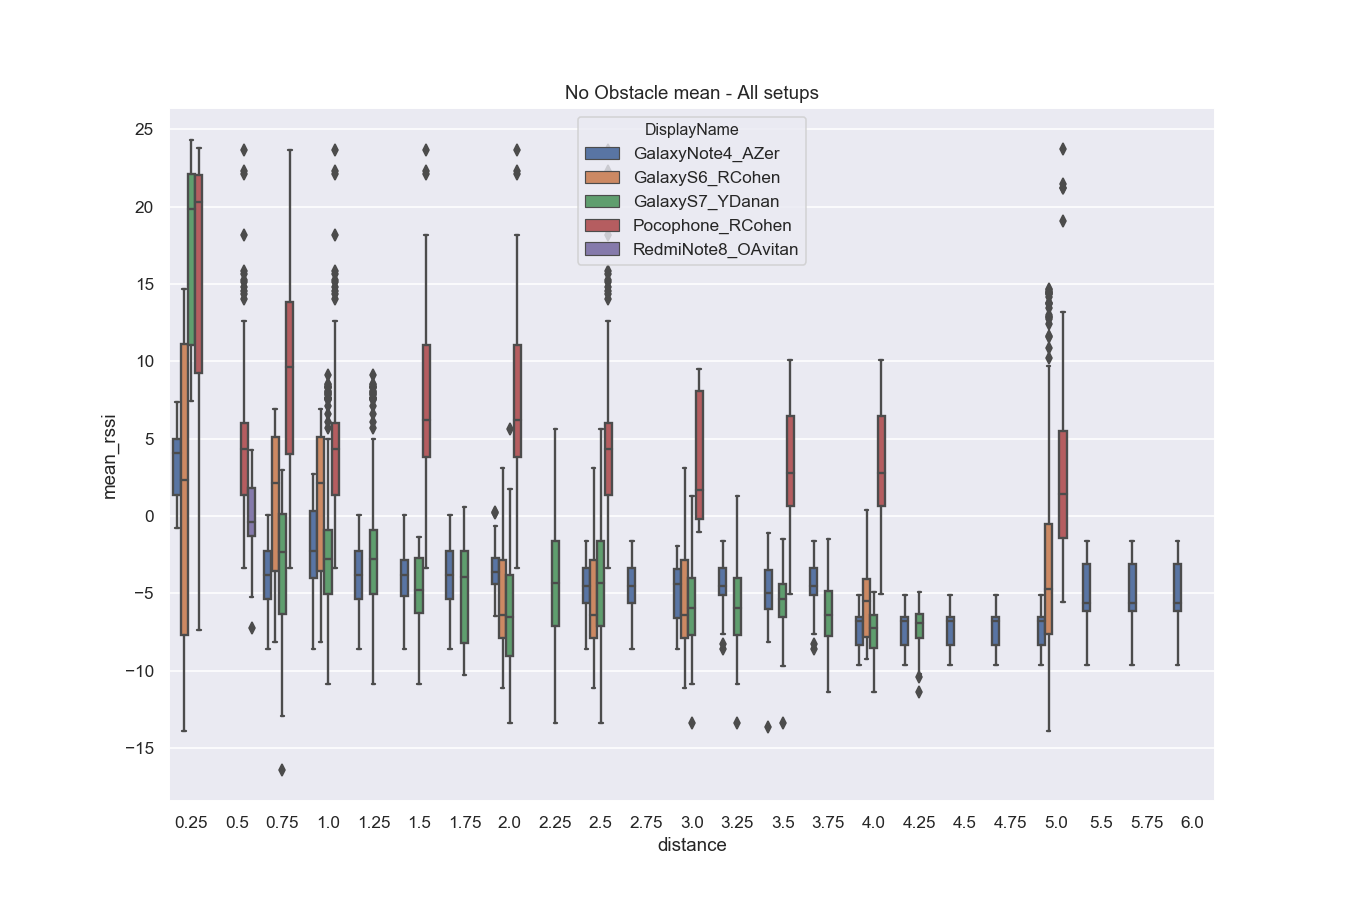

In [8]:
PlotFuncsObj.plot_data( 'mean', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)

<IPython.core.display.Javascript object>


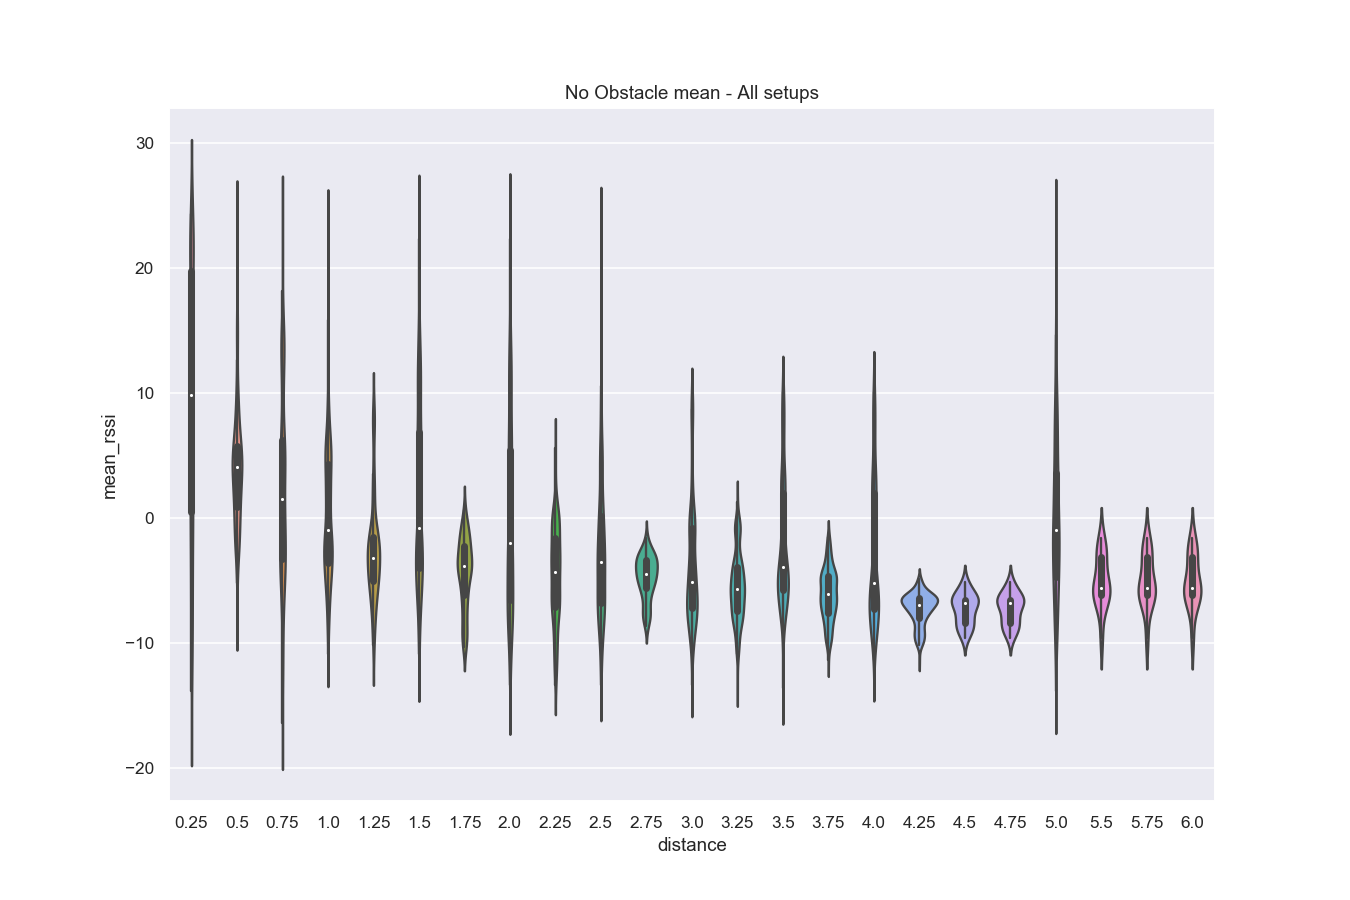

In [9]:
PlotFuncsObj.plot_data( 'mean', plot_func='violinplot',obstacle='No Obstacle')
# ax.figure.savefig("mean_rssi_violinplot.png")

Plot move variance

In [ ]:
PlotFuncsObj.plot_data( 'var', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
# ax.figure.savefig("var_rssi.png")

Plot counts

<IPython.core.display.Javascript object>


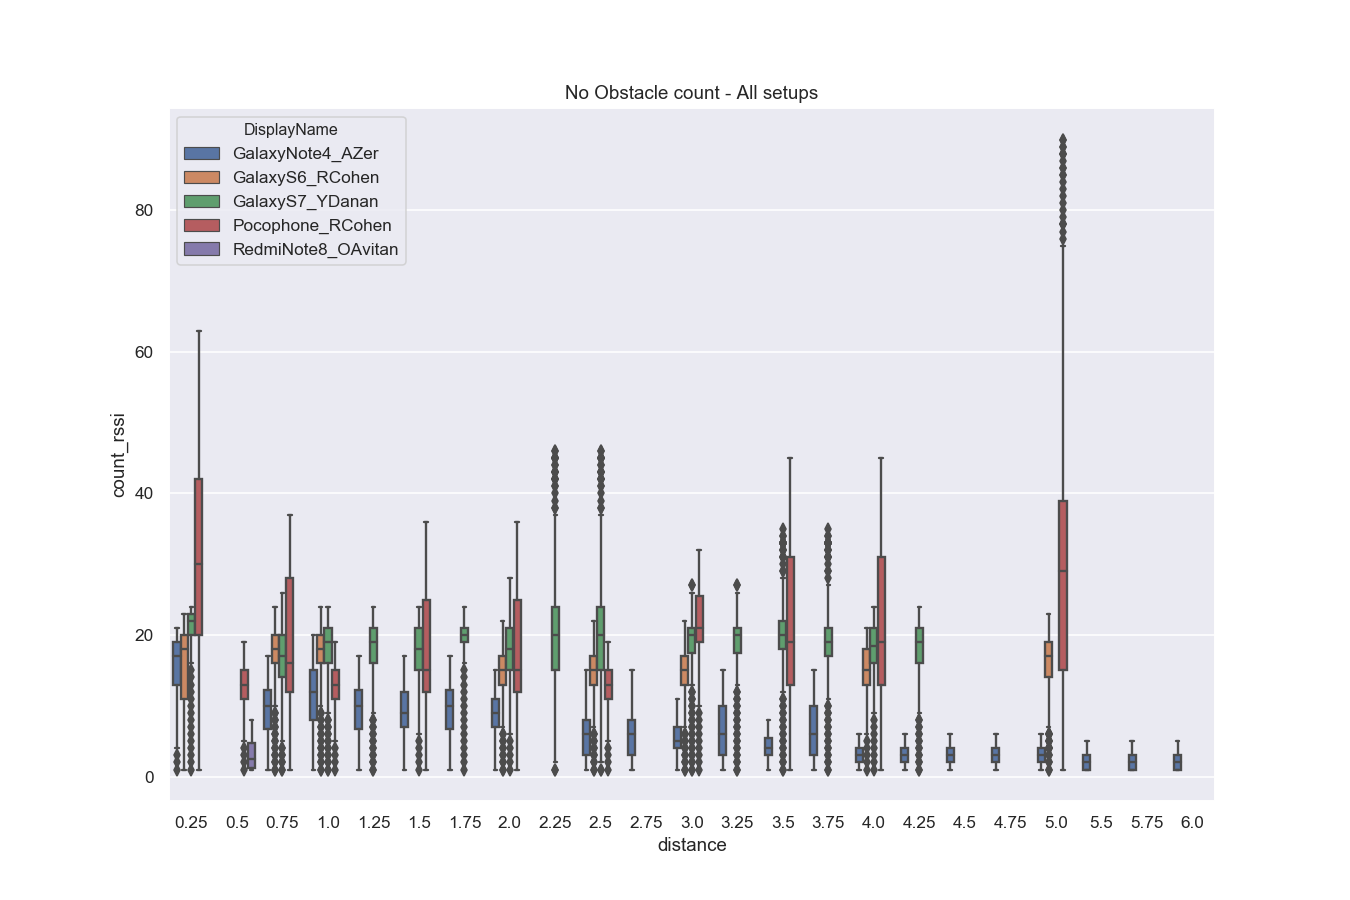

In [12]:
PlotFuncsObj.plot_data('count', plot_func='boxplot',obstacle='No Obstacle', plot_hue=1)
# ax.figure.savefig("count_rssi.png")

In [ ]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'count', plot_func='violinplot',obstacle='No Obstacle', plot_hue=0)
# ax.figure.savefig("count_rssi_violinplot.png")

Plot wanted percentile 

In [13]:
wanted_percentile = 95

In [ ]:
PlotFuncsObj.plot_data( 'percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
# ax.figure.savefig("percentile_"+str(wanted_percentile) +"_rssi.png")

<IPython.core.display.Javascript object>


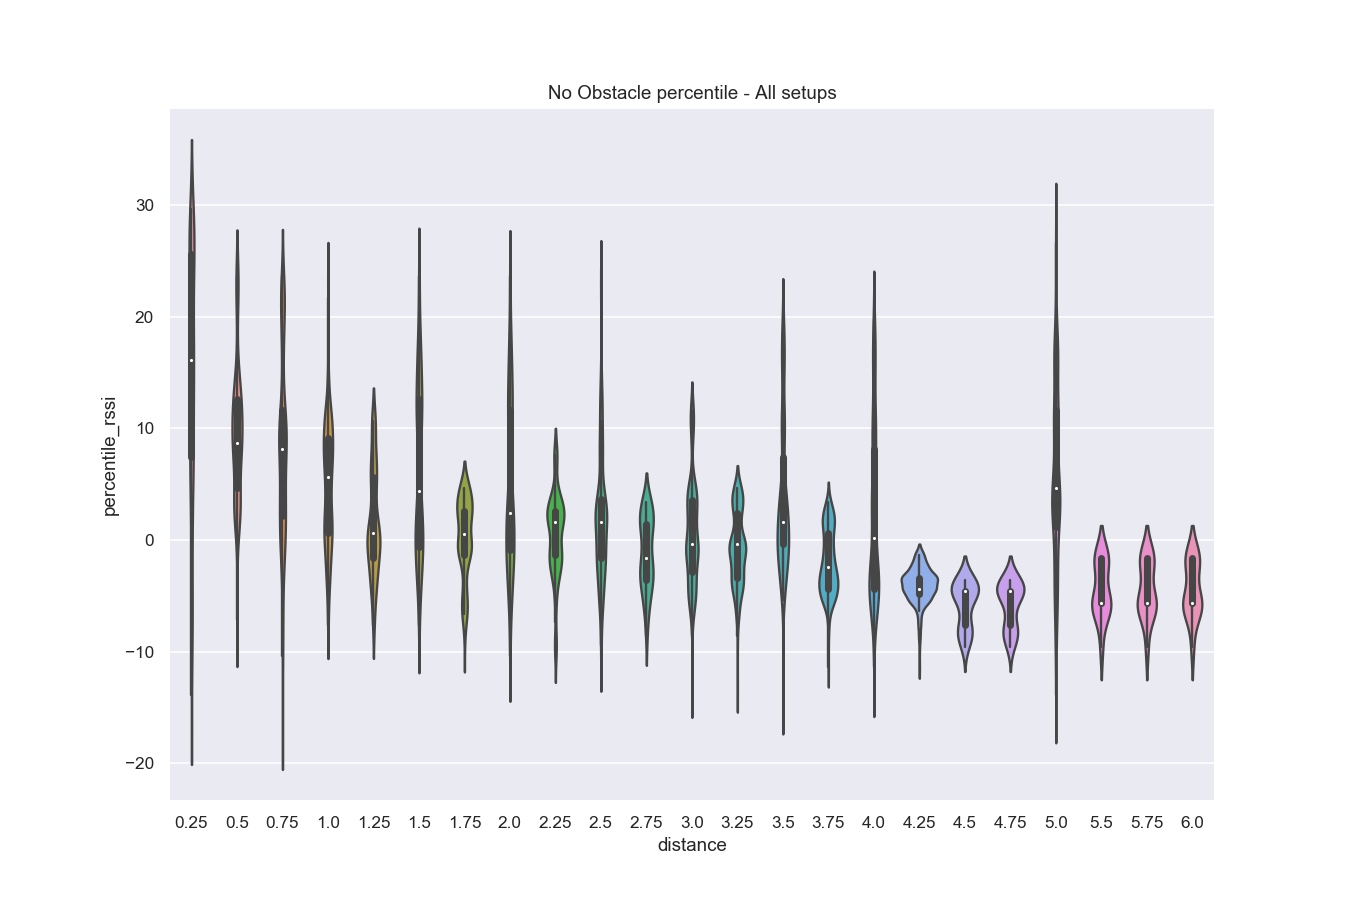

In [14]:
# plot violinplot to show semi distribution
PlotFuncsObj.plot_data( 'percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile,plot_hue=0)
# ax.figure.savefig("percentile_"+str(wanted_percentile) +"_rssi_violinplot.png")

Plot above percentile

In [ ]:
wanted_percentile = 85 

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=1)
# ax.figure.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile', plot_func='violinplot',obstacle='No Obstacle',percent=wanted_percentile, margin = 0,plot_hue=0)
# ax.figure.savefig("above_percentile_"+str(wanted_percentile)+"_rssi_violinplot.png")

Plot counts above percentile

In [ ]:
wanted_percentile = 85
margin = 1  

In [ ]:
PlotFuncsObj.plot_data( 'above_percentile_counts', plot_func='boxplot',obstacle='No Obstacle',percent=wanted_percentile, margin = margin,plot_hue=1)
# ax.figure.savefig("above_percentile_"+str(wanted_percentile)+"_rssi.png")

In [ ]:
plot_tag_data

# Are the two devices in the same room?


In [ ]:
measurements_same_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'No Obstacle')
measurements_same_room = measurements_same_room.dropna(how='any').reset_index(drop=True)

measurements_other_room = all_tag_measurements.where(all_tag_measurements.obstacle == 'Obstacle: wall')
measurements_other_room = measurements_other_room.dropna(how='any').reset_index(drop=True)

sns.boxplot(x=all_tag_measurements["obstacle"], y=all_tag_measurements["rssi"], hue =all_tag_measurements["DisplayName"]).set_title('All distances')